## Librerias Utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, ensemble,metrics
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,KFold, StratifiedKFold, cross_val_score,LeaveOneOut
from numpy import mean,std
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, accuracy_score,roc_curve,classification_report,auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')



## Apartado B Comparativa de modelos 

### Cargando los datos

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Obligamos que meutre todas las columnas
pd.set_option('display.max_columns', None)

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('db\\heart.csv')
data = dataset.values

### Entrenando modelo para comparativa

In [5]:
X = dataset.drop('output', axis=1)
y=dataset['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

### Regresion Logistica 

#### Determinar el mejor parametro

In [6]:
#Esta es una manera de determinar los parametros necesarios!
regresion_logistica= LogisticRegression()
tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,'penalty':['l1','l2']}
regresion_logistica= GridSearchCV(regresion_logistica, tuned_parameters,cv=10)
regresion_logistica.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [7]:
y_prob = regresion_logistica.predict_proba(X_test)[:,1]  
y_pred = np.where(y_prob > 0.5, 1, 0) 
regresion_logistica.score(X_test, y_pred)

1.0

In [153]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9312030731622141

Text(0.5, 0, 'False Positive Rate')

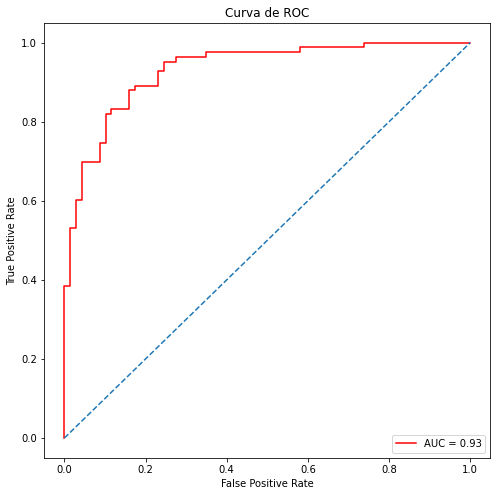

In [154]:
plt.figure(figsize=(8,8))
plt.title('Curva de ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### SVM 

In [155]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf']
    }

In [156]:
svm_model=SVC()
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=30)
model_svm.fit(X_train, y_train)
y_pred= model_svm.predict(X_test)

In [157]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.717565915837262

Text(0.5, 0, 'False Positive Rate')

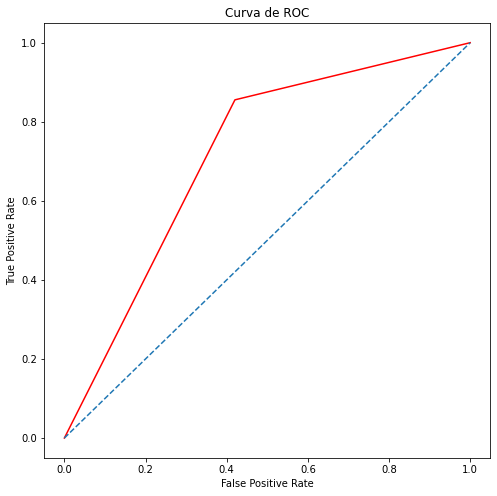

In [158]:
plt.figure(figsize=(8,8))
plt.title('Curva de ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Random Forest

In [159]:
modelo_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.15)
modelo_rf.fit(X_train,y_train)
y_pred=modelo_rf.predict(X_test)

In [160]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8418892963156974

Text(0.5, 0, 'False Positive Rate')

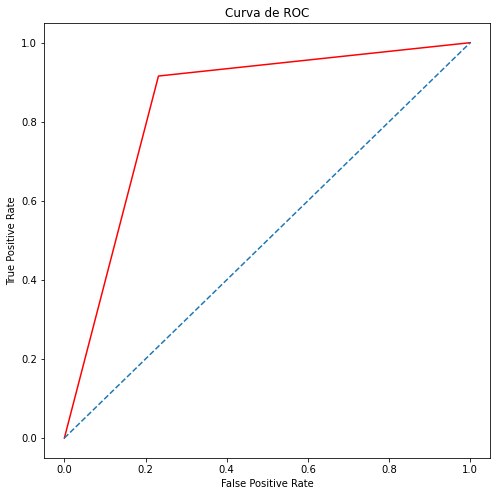

In [161]:
plt.figure(figsize=(8,8))
plt.title('Curva de ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Comparativa de modelos por presicion 

In [162]:
modelos_test = [SVC(kernel='linear',C =100),
          RandomForestClassifier(n_estimators=300,random_state=40),
          KNeighborsClassifier(), 
          LogisticRegression(max_iter=1000,solver='lbfgs'),
          DecisionTreeClassifier(),
          GaussianNB(),]

modelos = ['SVC', 'Random Forest','KNN',  'Regresion Logistica','DecisionTreeClassifier','GaussianNB']

In [163]:
scores_unscaled = []
for index,model in enumerate(modelos_test):
    try:
        model.fit(X_train,y_train)
        print("Precision =",modelos[index] ,":",round(model.score(X_train,y_train)*100,2),"%")
        scores_unscaled.append(round(model.score(X_train,y_train)*100,2))
    except:
        print("Skipped",modelos[index])

Precision = SVC : 82.12 %
Precision = Random Forest : 100.0 %
Precision = KNN : 76.82 %
Precision = Regresion Logistica : 82.78 %
Precision = DecisionTreeClassifier : 100.0 %
Precision = GaussianNB : 82.78 %


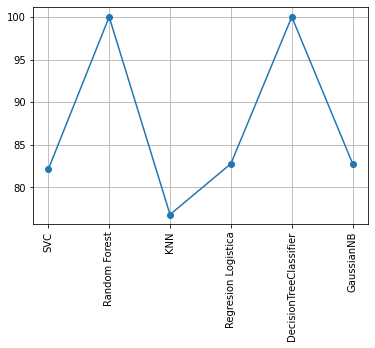

In [164]:
# plt.bar(range(len(modelnames)),scores_unscaled, color = ['blue','red'])
plt.plot(range(len(modelos)),scores_unscaled, '-o')
plt.xticks(range(0,6,1),labels = modelos, rotation = 90)
plt.grid(visible=True)

plt.show()

Correct classification Logistic  0.5 % of the data:  0.7697368421052632
Correct classification SVM       0.5 % of the data:  0.5986842105263158
Correct classification Logistic  0.7 % of the data:  0.6813186813186813
Correct classification SVM       0.7 % of the data:  0.6373626373626373
Correct classification Logistic  0.8 % of the data:  0.6557377049180327
Correct classification SVM       0.8 % of the data:  0.6721311475409836


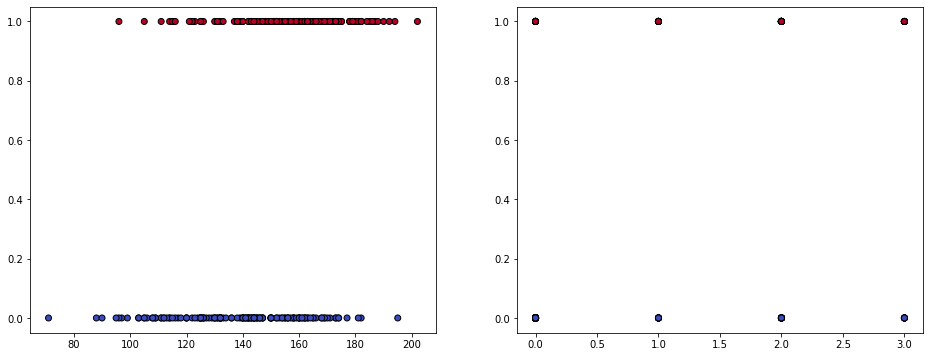

In [165]:
# Take the first 5 features. We could avoid this by using a two-dim dataset
X =  dataset[['thalachh','cp']].values
#X =  dataset[['thalach','cp','slp','exng','oldpeak','caa','thall']].values
#X =  dataset[['thalachh','cp','slp','exng','oldpeak']].values
y = dataset['output']

n_classes = 2
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creacion del regresor logistico 
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # Entrenamiento
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Utilizacion de máquinas de vectores de soporte
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # Entrenamiento 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))



In [166]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = data[:, :2]
    y = dataset['output']

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('KNeighbors Classifier',
              'Logistic Regression',
              'Decision Tree Classifier',
              'Random Forest')

    #C = 1.0  # SVM regularization parameter
    models = (
          KNeighborsClassifier(),
          LogisticRegression(max_iter=1000,solver='lbfgs'),
          DecisionTreeClassifier(),
           RandomForestClassifier(n_estimators=300,random_state=40))
              
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1= X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Frecuencia cardíaca máxima alcanzada')
        ax.set_ylabel('Tipo de dolor en el pecho')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


In [167]:
#Si realizamos variaciones con los numero obtenermos mejores resultados en algunos modelos 
#pero penalizamos otros.
#show_C_effect(C=0.01)

# Apartado A Clasificación Numérica

## 1. Implementacion de EDA (exploratory data analysis)

## Información del dataset

In [168]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Información de los primeros 5 elementos

In [169]:
dataset.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


### Estadística de los datos


In [170]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


### Dimensión del dataframe


In [171]:
dataset.shape

(303, 14)

## Exploración de datos

#### Frecuencia de padecer del corazon según el edad

<AxesSubplot:xlabel='age', ylabel='output'>

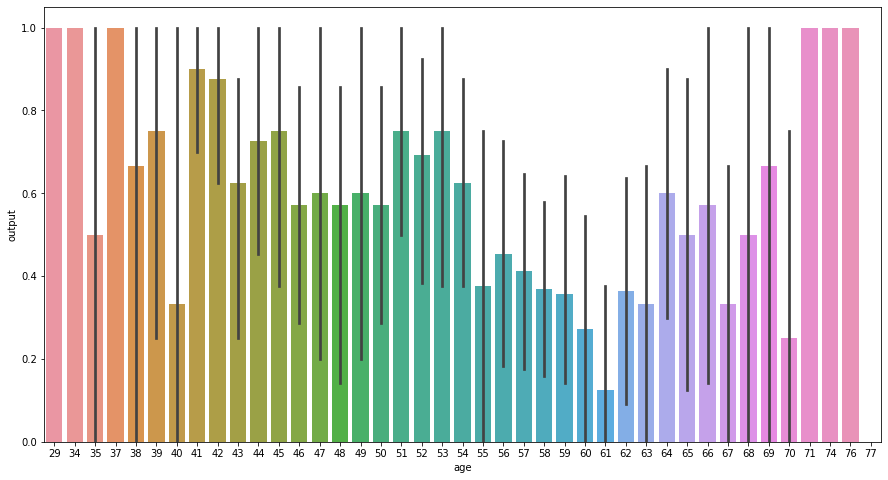

In [172]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(dataset['age'],dataset['output'],ax=ax)



#### Frecuencia cardíaca máxima alcanzada segun la edad

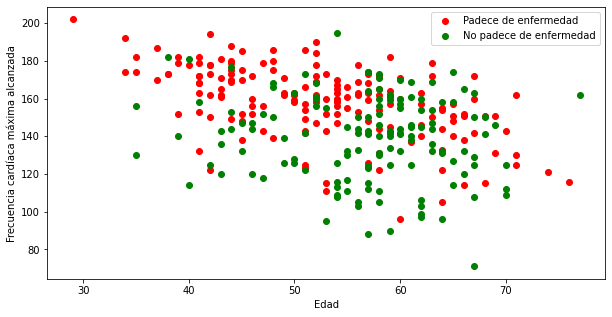

In [173]:
plt.subplots(figsize=(10, 5))
plt.scatter(x=dataset.age[dataset.output==1], y=dataset.thalachh[(dataset.output==1)], c="red")
plt.scatter(x=dataset.age[dataset.output==0], y=dataset.thalachh[(dataset.output==0)], c="green")
plt.legend(["Padece de enfermedad", "No padece de enfermedad"])
plt.xlabel("Edad")
plt.ylabel("Frecuencia cardíaca máxima alcanzada")
plt.show()

#### Frecuencia de padecer del corazon según el sexo

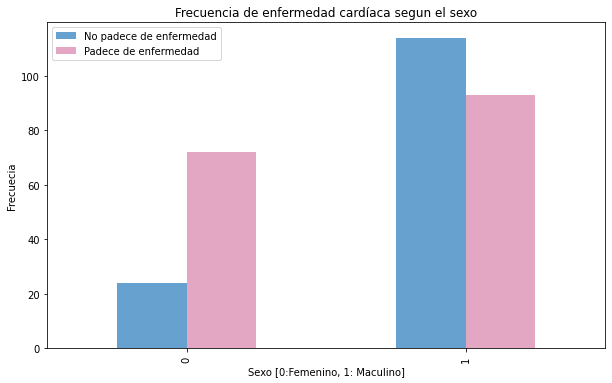

In [174]:
pd.crosstab(dataset.sex,dataset.output).plot(kind="bar",figsize=(10,6),color=['#67a1cf','#e3a6c3' ])
plt.title('Frecuencia de enfermedad cardíaca segun el sexo')
plt.xlabel('Sexo [0:Femenino, 1: Maculino]')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.ylabel('Frecuecia')
plt.show()

#### Frecuencia de padecer del corazon según el tipo de dolor en el pecho

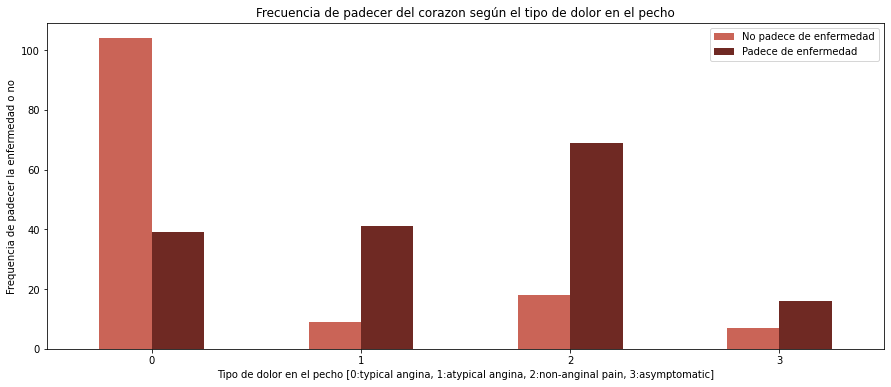

In [175]:
pd.crosstab(dataset.cp,dataset.output).plot(kind="bar",figsize=(15,6),color=['#ca6457','#6f2923' ])
plt.title('Frecuencia de padecer del corazon según el tipo de dolor en el pecho')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.xlabel('Tipo de dolor en el pecho [0:typical angina, 1:atypical angina, 2:non-anginal pain, 3:asymptomatic]')
plt.xticks(rotation = 0)
plt.ylabel('Frequencia de padecer la enfermedad o no')
plt.show()

#### Frecuencia de padecer del corazon según el nivel de azucar en sangre

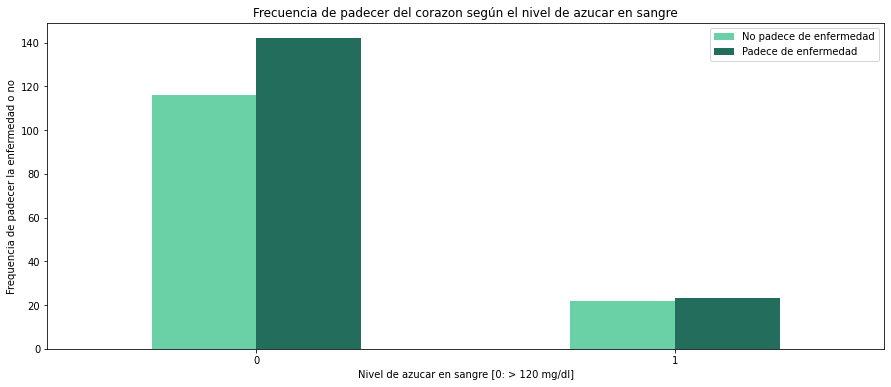

In [176]:
pd.crosstab(dataset.fbs,dataset.output).plot(kind="bar",figsize=(15,6),color=['#6ad0a6','#226d5c' ])
plt.title('Frecuencia de padecer del corazon según el nivel de azucar en sangre')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.xlabel('Nivel de azucar en sangre [0: > 120 mg/dl]')
plt.xticks(rotation = 0)
plt.ylabel('Frequencia de padecer la enfermedad o no')
plt.show()

#### Frecuencia de padecer del corazon según resultados electrocardiográficos en reposo

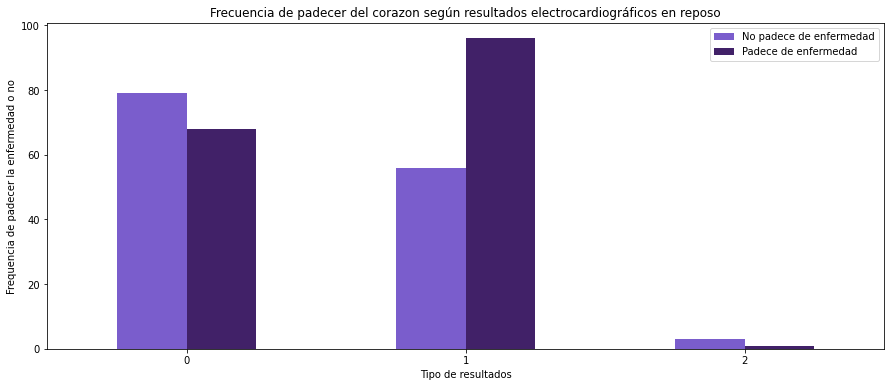

In [177]:
pd.crosstab(dataset.restecg,dataset.output).plot(kind="bar",figsize=(15,6),color=['#7a5dcc','#412168' ])
plt.title('Frecuencia de padecer del corazon según resultados electrocardiográficos en reposo')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.xlabel('Tipo de resultados')
plt.xticks(rotation = 0)
plt.ylabel('Frequencia de padecer la enfermedad o no')
plt.show()

### Frecuencia de padecer del corazon según Talisemia

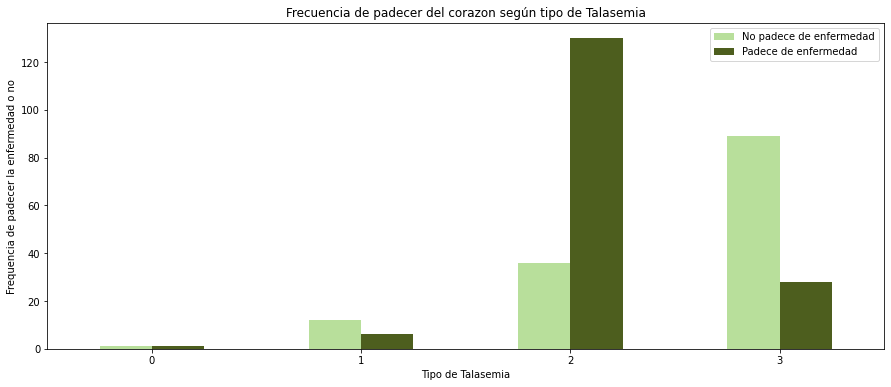

In [178]:
pd.crosstab(dataset.thall,dataset.output).plot(kind="bar",figsize=(15,6),color=['#b8df9b','#4d5e1e' ])
plt.title('Frecuencia de padecer del corazon según tipo de Talasemia')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.xlabel('Tipo de Talasemia')
plt.xticks(rotation = 0)
plt.ylabel('Frequencia de padecer la enfermedad o no')
plt.show()

### Analisis de Multivariables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

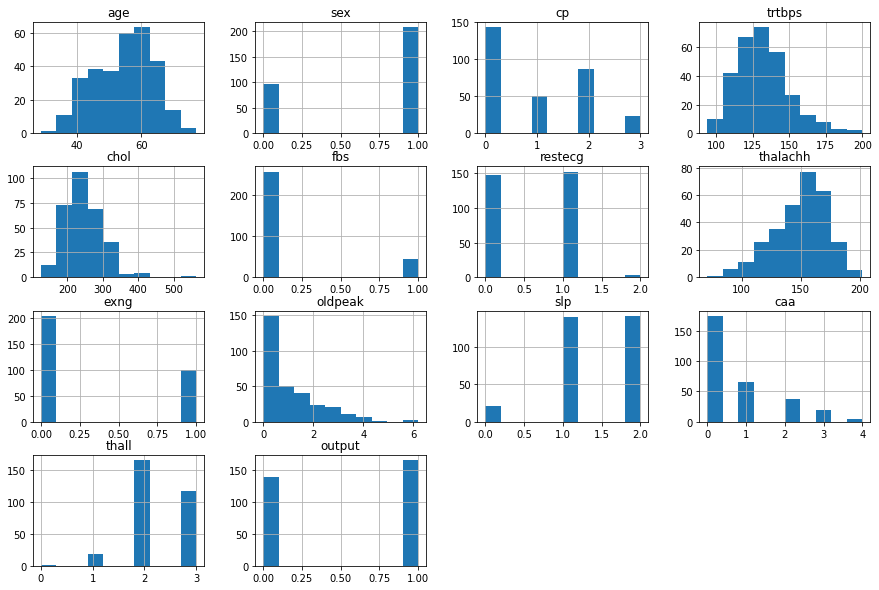

In [179]:
dataset.hist(figsize=(15,10))

In [180]:
#sns.pairplot(dataset, hue='output', diag_kind = "kde", kind = "scatter", palette = "husl")

### Correlación de los atributos

<AxesSubplot:>

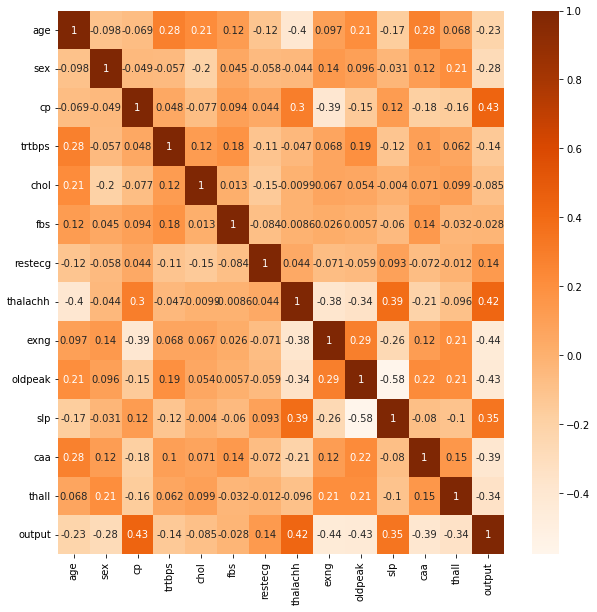

In [181]:
correlacion = dataset.iloc[:].corr()
fig , ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
sns.heatmap(correlacion,annot=True,cmap="Oranges")

In [182]:
# Corelation with target

corr = dataset.corr()
pd.DataFrame(corr['output']).sort_values(by='output',ascending = False).style.background_gradient(cmap = 'Reds')

,output
output,1.000000
cp,0.433798
thalachh,0.421741
slp,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trtbps,-0.144931
age,-0.225439
sex,-0.280937


## 2. Preprocessing

### Valores Nulos

<AxesSubplot:>

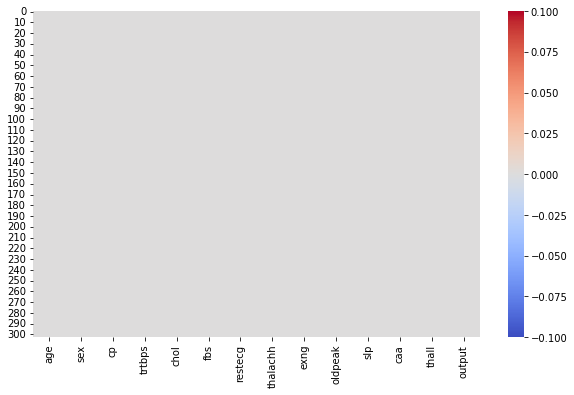

In [183]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(dataset.isnull(),cmap="coolwarm",ax=ax)

#### Eliminacion de los valores nulos

In [184]:
def columns_with_na(dframe):
    temp = dframe.isna().sum()
    temp = temp[temp >0]
    print(f"Columns containing nan values:{temp.index}")
    return temp.index

columns_to_drop = list(columns_with_na(dataset))
dataset.drop(columns_to_drop, axis=1, inplace = True)

Columns containing nan values:Index([], dtype='object')


### Visualizacion de valores atípicos

In [185]:
#Eliminacion de datos duplicados
dataset[dataset.duplicated() == True]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.000,2,4,2,1


In [186]:
dataset.drop_duplicates(inplace = True)

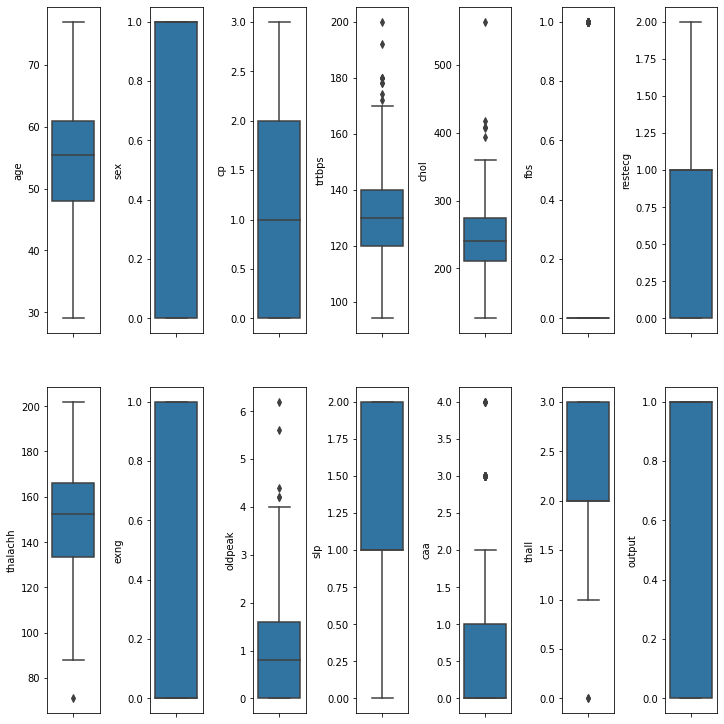

In [187]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (10, 10))
index = 0
ax = ax.flatten()

for col, value in dataset.items():
    sns.boxplot(y=col, data=dataset, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [188]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


### Normalización de los datos

In [189]:
dataset_norm=dataset.copy()

columnas = ['trtbps', 'chol', 'thalachh', 'oldpeak', 'age']
for col in columnas:
    minimum = min(dataset_norm[col])
    maximum = max(dataset_norm[col])
    dataset_norm[col] = (dataset_norm[col] - minimum)/ (maximum - minimum)

In [190]:
dataset_norm

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708,1,3,0.481,0.244,1,0,0.603,0,0.371,0,0,1,1
1,0.167,1,2,0.340,0.283,0,1,0.885,0,0.565,0,0,2,1
2,0.250,0,1,0.340,0.178,0,0,0.771,0,0.226,2,0,2,1
3,0.562,1,1,0.245,0.251,0,1,0.817,0,0.129,2,0,2,1
4,0.583,0,0,0.245,0.521,0,1,0.702,1,0.097,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583,0,0,0.434,0.263,0,1,0.397,1,0.032,1,0,3,0
299,0.333,1,3,0.151,0.315,0,1,0.466,0,0.194,1,0,3,0
300,0.812,1,0,0.472,0.153,1,1,0.534,0,0.548,1,2,3,0
301,0.583,1,0,0.340,0.011,0,1,0.336,1,0.194,1,1,3,0


### Visualización después de normalizar

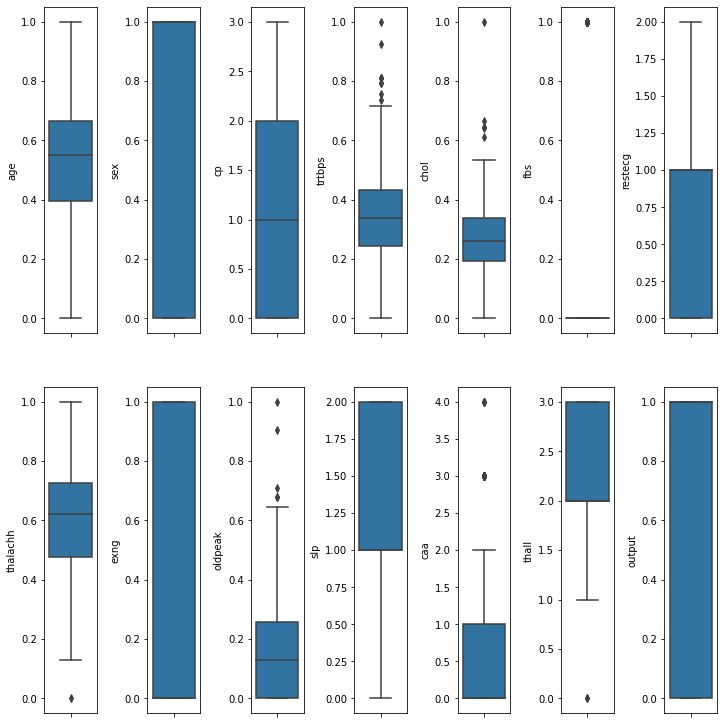

In [191]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (10, 10))
index = 0
ax = ax.flatten()

for col, value in dataset.items():
    sns.boxplot(y=col, data=dataset_norm, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

### Agregamos columnas categoricas a partir de valores categoricos

In [192]:
df_sense = dataset.copy()
df_sense.drop(['sex', 'chol', 'restecg', 'fbs'], axis=1, inplace=True)
df_sense.head()

,age,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,3,145,150,0,2.300,0,0,1,1
1,37,2,130,187,0,3.500,0,0,2,1
2,41,1,130,172,0,1.400,2,0,2,1
3,56,1,120,178,0,0.800,2,0,2,1
4,57,0,120,163,1,0.600,2,0,2,1


In [193]:
one_hot_data=df_sense.copy()
one_hot_data.head()

,age,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,3,145,150,0,2.300,0,0,1,1
1,37,2,130,187,0,3.500,0,0,2,1
2,41,1,130,172,0,1.400,2,0,2,1
3,56,1,120,178,0,0.800,2,0,2,1
4,57,0,120,163,1,0.600,2,0,2,1


In [194]:
#CP: type of chest pain 
one_hot_data.loc[one_hot_data['cp'] == 0, 'cp'] = 'typical angina'
one_hot_data.loc[one_hot_data['cp'] == 1, 'cp'] = 'atypical angina'
one_hot_data.loc[one_hot_data['cp'] == 2, 'cp'] = 'non-anginal pain'
one_hot_data.loc[one_hot_data['cp'] == 3, 'cp'] = 'asymptomatic'
# enxercise induced angina
one_hot_data.loc[one_hot_data['exng'] == 1, 'exng'] = 'yes'
one_hot_data.loc[one_hot_data['exng'] == 0, 'exng'] = 'no'
#slope of peak exercise ST segment
one_hot_data.loc[one_hot_data['slp'] == 0, 'slp'] = 'upsloping'
one_hot_data.loc[one_hot_data['slp'] == 1, 'slp'] = 'flat'
one_hot_data.loc[one_hot_data['slp'] == 2, 'slp'] = 'downsloping'
#thalassemia blood disorder
one_hot_data.loc[one_hot_data['thall'] == 0, 'thall'] = 'None'
one_hot_data.loc[one_hot_data['thall'] == 1, 'thall'] = 'fixed defect'
one_hot_data.loc[one_hot_data['thall'] == 2, 'thall'] = 'normal blood flow'
one_hot_data.loc[one_hot_data['thall'] == 3, 'thall'] = 'reversible defect'



### Codificacion con One Hot Encoding

In [195]:
X=one_hot_data.iloc[:, :-1]
y=one_hot_data.iloc[:, -1]

#Entrenando al modelo
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1, stratify=y)

In [196]:
encoding_cols = ['cp', 'exng', 'slp', 'thall']

oh_encode = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

x_train_encoded = pd.DataFrame(oh_encode.fit_transform(x_train[encoding_cols]), index = x_train.index)
x_test_encoded = pd.DataFrame(oh_encode.transform(x_test[encoding_cols]), index = x_test.index)

x_train_num = x_train.drop(['cp', 'exng', 'slp', 'thall'], axis=1)
x_test_num = x_test.drop(['cp', 'exng', 'slp', 'thall'], axis=1)

x_train_en = pd.concat([x_train_num, x_train_encoded], axis=1)
x_test_en = pd.concat([x_test_num, x_test_encoded], axis=1)

In [197]:
x_train_en.head()

,age,trtbps,thalachh,oldpeak,caa,0,1,2,3,4,5,6,7,8,9,10,11,12
53,44,108,175,0.600,0,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
44,39,140,182,0.000,0,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
154,39,138,152,0.000,0,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
250,51,140,122,4.200,3,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
181,65,150,114,1.000,3,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000


In [198]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


## 3. Model Selection

### Preparacion del modelo

In [199]:
modelos = pd.DataFrame(columns=["Modelo","Precision"])
modelos_rl = pd.DataFrame(columns=["Modelo","Precision","C","fit_intercept","penalty","tol"])
modelos_svm =pd.DataFrame(columns=["Modelo","Precision","C","probability","gamma","tol"])
modelos_svm_linear =pd.DataFrame(columns=["Modelo","Precision","C","probability","gamma","tol"])
modelos_svm_poly =pd.DataFrame(columns=["Modelo","Precision","C","probability","gamma","tol"])
modelo_rf_=pd.DataFrame(columns=["Modelo","Precision","n_estimators","min_samples_leaf"])
modelo_knn=pd.DataFrame(columns=["Modelo","Precision","n"])

In [200]:
c_list=[0.001,0.01,0.1,1.0,2.0]
f_inter=[False,True]
gammas=['scale','auto']
estimadores=[100,200,300,500]
min_samples=[0.1,0.15,0.2,0.25,0.3]
n=[10,15,20,30,50]

In [201]:
X=dataset_norm.drop('output', axis=1)
#Variable Objetivo
y=dataset_norm['output']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

In [202]:
X.shape

(302, 13)

In [203]:
y.shape

(302,)

### Regresion Logistica

In [204]:
#Modelo
modelo=LogisticRegression(C=0.010,fit_intercept=True, penalty='l2',tol=0.001)
#Entrenamiento del modelo
modelo.fit(X_train,y_train)
#Prediccion en base al training test
prediccion=modelo.predict(X_test)
#Accuracy obtenido
acc=accuracy_score(y_test,prediccion)
valor={"Modelo":"Regresion Logistica","Precision":acc}
modelos=modelos.append(valor,ignore_index=True)
acc

0.8524590163934426

In [205]:
for i in c_list:
    for j in f_inter:
        #Modelo
        modelo=LogisticRegression(C=i,fit_intercept=j, penalty='l2',tol=0.001)
        #Entrenamiento del modelo
        modelo.fit(X_train,y_train)
        #Prediccion en base al training test
        prediccion=modelo.predict(X_test)
        #Accuracy obtenido
        acc=accuracy_score(y_test,prediccion)
        valor2={"Modelo":"Regresion Logistica","Precision":acc,"C":i,"fit_intercept":j,"penalty":"l2","tol":0.001}
        modelos_rl =modelos_rl .append(valor2,ignore_index=True)

In [206]:
modelos_rl.sort_values(by="Precision", ascending=False)

,Modelo,Precision,C,fit_intercept,penalty,tol
2,Regresion Logistica,0.869,0.010,False,l2,0.001
0,Regresion Logistica,0.852,0.001,False,l2,0.001
3,Regresion Logistica,0.852,0.010,True,l2,0.001
6,Regresion Logistica,0.852,1.000,False,l2,0.001
5,Regresion Logistica,0.836,0.100,True,l2,0.001
8,Regresion Logistica,0.836,2.000,False,l2,0.001
4,Regresion Logistica,0.820,0.100,False,l2,0.001
7,Regresion Logistica,0.820,1.000,True,l2,0.001
9,Regresion Logistica,0.820,2.000,True,l2,0.001
1,Regresion Logistica,0.557,0.001,True,l2,0.001


#### Matriz de confusion 

<AxesSubplot:>

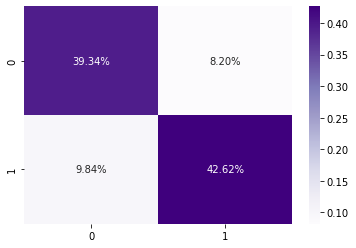

In [207]:
cm_rl=confusion_matrix(y_test,prediccion)
sns.heatmap(cm_rl/np.sum(cm_rl),annot = True, fmt=  '0.2%',cmap ='Purples')

### SMV

#### SMV kernel: rbf

In [208]:
#Modelo
modelo_svm = SVC(C=2.0,kernel='rbf',gamma='scale',probability=True,tol=0.001)
#Entrenamiento del modelo
modelo_svm.fit(X_train,y_train)
#Prediccion en base al training test
prediccion_svg=modelo_svm.predict(X_test)
#Accuracy obtenido
acc_svg=accuracy_score(y_test,prediccion_svg)
valor={"Modelo":"SVG_rbf","Precision":acc_svg}
modelos=modelos.append(valor,ignore_index=True)
acc_svg

0.8688524590163934

In [209]:
for i in c_list:
    for j in gammas:
        #Modelo
        modelo_svm = SVC(C=i,kernel='rbf',tol=0.001,probability=True)
        #Entrenamiento del modelo
        modelo_svm.fit(X_train,y_train)
        #Prediccion en base al training test
        prediccion_svg=modelo_svm.predict(X_test)
        #Accuracy obtenido
        acc_svg=accuracy_score(y_test,prediccion_svg)
        valor2={"Modelo":"SVG_rbf","Precision":acc_svg,"C":i,"probability":'True','gamma':j,"tol":0.001}
        modelos_svm = modelos_svm.append(valor2,ignore_index=True)
        

In [210]:
modelos_svm.sort_values(by="Precision", ascending=False)

,Modelo,Precision,C,probability,gamma,tol
4,SVG_rbf,0.869,0.100,True,scale,0.001
5,SVG_rbf,0.869,0.100,True,auto,0.001
6,SVG_rbf,0.869,1.000,True,scale,0.001
7,SVG_rbf,0.869,1.000,True,auto,0.001
8,SVG_rbf,0.869,2.000,True,scale,0.001
9,SVG_rbf,0.869,2.000,True,auto,0.001
0,SVG_rbf,0.525,0.001,True,scale,0.001
1,SVG_rbf,0.525,0.001,True,auto,0.001
2,SVG_rbf,0.525,0.010,True,scale,0.001
3,SVG_rbf,0.525,0.010,True,auto,0.001


<AxesSubplot:>

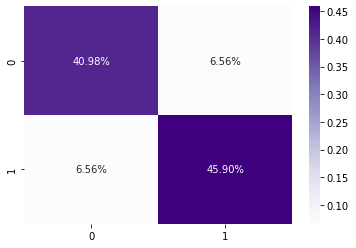

In [211]:
cm_svg=confusion_matrix(y_test,prediccion_svg)
sns.heatmap(cm_svg/np.sum(cm_svg),annot = True, fmt=  '0.2%',cmap ='Purples')

#### SRV kernel: linear

In [212]:
#Modelo
modelo_svm = SVC(C=2.0,kernel='linear',gamma='scale',probability=True,tol=0.001)
#Entrenamiento del modelo
modelo_svm.fit(X_train,y_train)
#Prediccion en base al training test
prediccion_svg=modelo_svm.predict(X_test)
#Accuracy obtenido
acc_svg=accuracy_score(y_test,prediccion_svg)
valor={"Modelo":"SVG_linear","Precision":acc_svg}
modelos=modelos.append(valor,ignore_index=True)
acc_svg

0.8360655737704918

In [213]:
for i in c_list:
    for j in gammas:
        #Modelo
        modelo_svm = SVC(C=2.0,kernel='linear',gamma='scale',probability=True,tol=0.001)
        #Entrenamiento del modelo
        modelo_svm.fit(X_train,y_train)
        #Prediccion en base al training test
        prediccion_svg=modelo_svm.predict(X_test)
        #Accuracy obtenido
        acc_svg=accuracy_score(y_test,prediccion_svg)
        valor2={"Modelo":"SVG_linear","Precision":acc_svg,"C":i,"probability":'True','gamma':j,"tol":0.01}
        modelos_svm_linear = modelos_svm_linear.append(valor2,ignore_index=True)


In [214]:
modelos_svm_linear.sort_values(by="Precision", ascending=False)

,Modelo,Precision,C,probability,gamma,tol
0,SVG_linear,0.836,0.001,True,scale,0.010
1,SVG_linear,0.836,0.001,True,auto,0.010
2,SVG_linear,0.836,0.010,True,scale,0.010
3,SVG_linear,0.836,0.010,True,auto,0.010
4,SVG_linear,0.836,0.100,True,scale,0.010
5,SVG_linear,0.836,0.100,True,auto,0.010
6,SVG_linear,0.836,1.000,True,scale,0.010
7,SVG_linear,0.836,1.000,True,auto,0.010
8,SVG_linear,0.836,2.000,True,scale,0.010
9,SVG_linear,0.836,2.000,True,auto,0.010


<AxesSubplot:>

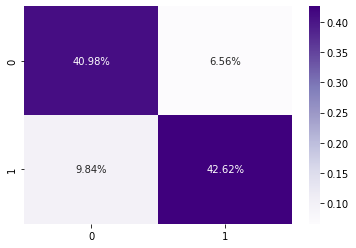

In [215]:
cm_svg=confusion_matrix(y_test,prediccion_svg)
sns.heatmap(cm_svg/np.sum(cm_svg),annot = True, fmt=  '0.2%',cmap ='Purples')

#### SRV kernel: poly

In [216]:
#Modelo
modelo_svm = SVC(C=2.0,kernel='linear',gamma='scale',probability=True,tol=0.001)
#Entrenamiento del modelo
modelo_svm.fit(X_train,y_train)
#Prediccion en base al training test
prediccion_svg=modelo_svm.predict(X_test)
#Accuracy obtenido
acc_svg=accuracy_score(y_test,prediccion_svg)
valor={"Modelo":"SVG_poly","Precision":acc_svg}
modelos=modelos.append(valor,ignore_index=True)
acc_svg

0.8360655737704918

In [217]:
for i in c_list:
    for j in gammas:
        #Modelo
        modelo_svm = SVC(C=2.0,kernel='linear',gamma='scale',probability=True,tol=0.001)
        #Entrenamiento del modelo
        modelo_svm.fit(X_train,y_train)
        #Prediccion en base al training test
        prediccion_svg=modelo_svm.predict(X_test)
        #Accuracy obtenido
        acc_svg=accuracy_score(y_test,prediccion_svg)
        valor2={"Modelo":"SVG_poly","Precision":acc_svg,"C":i,"probability":'True','gamma':j,"tol":0.01}
        modelos_svm_poly = modelos_svm_poly.append(valor2,ignore_index=True)

In [218]:
modelos_svm_poly.sort_values(by="Precision", ascending=False)

,Modelo,Precision,C,probability,gamma,tol
0,SVG_poly,0.836,0.001,True,scale,0.010
1,SVG_poly,0.836,0.001,True,auto,0.010
2,SVG_poly,0.836,0.010,True,scale,0.010
3,SVG_poly,0.836,0.010,True,auto,0.010
4,SVG_poly,0.836,0.100,True,scale,0.010
5,SVG_poly,0.836,0.100,True,auto,0.010
6,SVG_poly,0.836,1.000,True,scale,0.010
7,SVG_poly,0.836,1.000,True,auto,0.010
8,SVG_poly,0.836,2.000,True,scale,0.010
9,SVG_poly,0.836,2.000,True,auto,0.010


<AxesSubplot:>

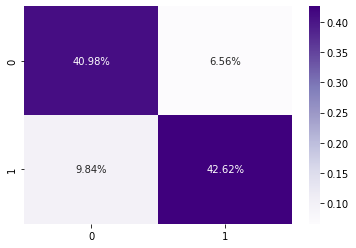

In [219]:
cm_svg=confusion_matrix(y_test,prediccion_svg)
sns.heatmap(cm_svg/np.sum(cm_svg),annot = True, fmt=  '0.2%',cmap ='Purples')

### Random Forest 

In [220]:
#Modelo
modelo_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.15)
#Entrenamiento del modelo
modelo_rf.fit(X_train,y_train)
#Prediccion en base al training test
prediccion_rf=modelo_rf.predict(X_test)
#Accuracy obtenido
acc_rf=accuracy_score(y_test,prediccion_rf)
valor={"Modelo":"Random Forest","Precision":acc_rf}
modelos=modelos.append(valor,ignore_index=True)
acc_rf

0.8688524590163934

In [221]:
for i in estimadores:
    for j in min_samples:
        #Modelo
        modelo_rf = RandomForestClassifier(n_estimators=i,min_samples_leaf=j)
        #Entrenamiento del modelo
        modelo_rf.fit(X_train,y_train)
        #Prediccion en base al training test
        prediccion_rf=modelo_rf.predict(X_test)
        #Accuracy obtenido
        acc_rf=accuracy_score(y_test,prediccion_rf)
        valor={"Modelo":"Random Forest","Precision":acc_rf,"n_estimators":i,"min_samples_leaf":j}
        modelo_rf_=modelo_rf_.append(valor,ignore_index=True)

In [222]:
modelo_rf_.sort_values(by="Precision", ascending=False)

,Modelo,Precision,n_estimators,min_samples_leaf
0,Random Forest,0.869,100,0.100
7,Random Forest,0.869,200,0.200
16,Random Forest,0.869,500,0.150
15,Random Forest,0.869,500,0.100
12,Random Forest,0.869,300,0.200
1,Random Forest,0.869,100,0.150
10,Random Forest,0.869,300,0.100
6,Random Forest,0.869,200,0.150
5,Random Forest,0.869,200,0.100
11,Random Forest,0.852,300,0.150


<AxesSubplot:>

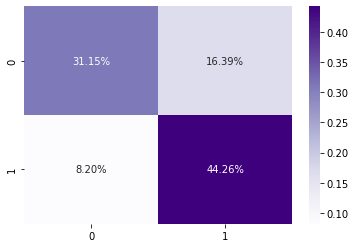

In [223]:
cm_rf=confusion_matrix(y_test,prediccion_rf)
sns.heatmap(cm_rf/np.sum(cm_rf),annot = True, fmt=  '0.2%', cmap ='Purples')

### KNN

In [224]:
#Modelo
knn =  KNeighborsClassifier(n_neighbors=15)
#Entrenamiento del modelo
knn.fit(X_train, y_train)
#Prediccion en base al training test
prediccion_knn=knn.predict(X_test)
#Accuracy obtenido
acc_knn=accuracy_score(y_test,prediccion_knn)
valor={"Modelo":"Knn","Precision":acc_knn}
modelos=modelos.append(valor,ignore_index=True)
acc_knn

0.9016393442622951

In [225]:
for i in n:
    #Modelo
    knn =  KNeighborsClassifier(n_neighbors=i)
    #Entrenamiento del modelo
    knn.fit(X_train, y_train)
    #Prediccion en base al training test
    prediccion_knn=knn.predict(X_test)
    #Accuracy obtenido
    acc_knn=accuracy_score(y_test,prediccion_knn)
    
    valor={"Modelo":"Knn","Precision":acc_knn,"n":i}
    modelo_knn=modelo_knn.append(valor,ignore_index=True)


In [226]:
modelo_knn.sort_values(by="Precision", ascending=False)

,Modelo,Precision,n
1,Knn,0.902,15
0,Knn,0.869,10
3,Knn,0.869,30
2,Knn,0.852,20
4,Knn,0.852,50


<AxesSubplot:>

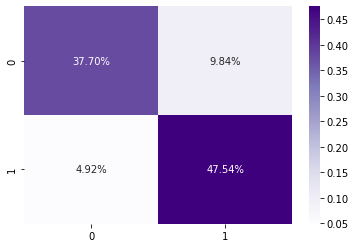

In [227]:
cm_knn=confusion_matrix(y_test,prediccion_knn)
sns.heatmap(cm_knn/np.sum(cm_knn),annot = True, fmt=  '0.2%', cmap ='Purples')

In [228]:
modelos.sort_values(by="Precision", ascending=False)

,Modelo,Precision
5,Knn,0.902
1,SVG_rbf,0.869
4,Random Forest,0.869
0,Regresion Logistica,0.852
2,SVG_linear,0.836
3,SVG_poly,0.836


## 4. Crossvalidation

In [229]:
#Seleccionamos solo los elementos numericos
#numeric_cols=[cname for cname in dataset.columns if dataset[cname].dtype in ['int64', 'float64']]
#numeric_cols
#En nuestro caso todos los elementos son numericos, sino tendriamos que seleccionar solo los elementos numericos.
#X= dataset[numeric_cols].copy()

#Asignacion de variable independientes
X=dataset_norm.drop('output', axis=1)
#Variable Objetivo
y=dataset_norm['output']
#X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)
print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))
X.head()

Shape of input data: (302, 13) and shape of target variable: (302,)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708,1,3,0.481,0.244,1,0,0.603,0,0.371,0,0,1
1,0.167,1,2,0.340,0.283,0,1,0.885,0,0.565,0,0,2
2,0.250,0,1,0.340,0.178,0,0,0.771,0,0.226,2,0,2
3,0.562,1,1,0.245,0.251,0,1,0.817,0,0.129,2,0,2
4,0.583,0,0,0.245,0.521,0,1,0.702,1,0.097,2,0,2


### Crossvalidation en base al (RMSE)

In [230]:
#Usemos cross_val_score para evaluar una puntuación mediante validación cruzada.
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 241, Test set:61
Fold:2, Train set: 241, Test set:61
Fold:3, Train set: 242, Test set:60
Fold:4, Train set: 242, Test set:60
Fold:5, Train set: 242, Test set:60


In [231]:
#Analizaremos el rendimiento del modelo en función de la raíz del error cuadrático medio (RMSE).
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

#### Evaluación de Random Forest

In [232]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores para cada fold son: {score}')
rmse(score.mean())

Scores para cada fold son: [-0.10541148 -0.15086885 -0.11806    -0.170885   -0.12727167]
rmse= 0.37


#### Ajuste del modelo

In [233]:
#A partir de 250 es un buen estimador !
estimators = [50, 100, 150, 200, 250]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 50
rmse= 0.37
For estimators: 100
rmse= 0.37
For estimators: 150
rmse= 0.37
For estimators: 200
rmse= 0.37
For estimators: 250
rmse= 0.37


#### Evaluación de regresión Logistica

In [234]:
score = cross_val_score(LogisticRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores para cada fold son: {score}')
rmse(score.mean())

Scores para cada fold son: [-0.18032787 -0.18032787 -0.13333333 -0.25       -0.2       ]
rmse= 0.43


### Crossvalidation en base al accuracy

#### Evaluación de Random Forest

In [235]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.86885246 0.78688525 0.85       0.73333333 0.8       ]
Average score: 0.81


#### Ajustes del modelo

In [236]:
n_estimators = [50, 100, 150, 200, 250, 300]

for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 0.821
Average score(100): 0.808
Average score(150): 0.821
Average score(200): 0.828
Average score(250): 0.821
Average score(300): 0.824


#### Evaluación de regresión Logistica

In [237]:
score = cross_val_score(LogisticRegression(), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.81967213 0.81967213 0.86666667 0.75       0.8       ]
Average score: 0.81


### Implementacion de LOO

In [238]:
loo = LeaveOneOut()
loo.get_n_splits(X)
crossvalidation = KFold(n_splits=5, random_state=None, shuffle=False)
scores = cross_val_score(modelo_rf, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))))

Folds: 5, MSE: 0.6958469945355191


In [239]:
loo = LeaveOneOut()
loo.get_n_splits(X)
crossvalidation = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(modelo_rf, X, y, scoring="accuracy", cv=crossvalidation,
 n_jobs=1)
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))))

Folds: 5, MSE: 0.7516393442622951


## 5. Metric Analysis

In [240]:
def evaluate_preds(y_true, y_preds):
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  print(f"Acc : {round(accuracy, 2) * 100:.2f}%")
  print(f"Precision : {round(precision, 2):.2f}")
  print(f"recall : {round(recall, 2):.2f}")
  print(f"F1 score {round(f1, 2):.2f}")

In [241]:
#Evaluacion del metodo selecciondo Random Forest
evaluate_preds(y_test,prediccion_rf)

Acc : 75.00%
Precision : 0.73
recall : 0.84
F1 score 0.78


In [242]:
#Evaluacion del metodo con menor presicion
evaluate_preds(y_test,prediccion)

Acc : 82.00%
Precision : 0.84
recall : 0.81
F1 score 0.83


### Roc curve

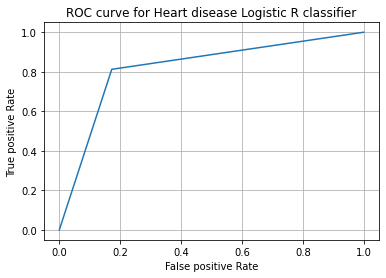

In [243]:
#Regresion Logistica
fpr, tpr, threshold = roc_curve(y_test, prediccion)
plt.plot(fpr, tpr)
plt.title('ROC curve for Heart disease Logistic R classifier')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.grid(True)

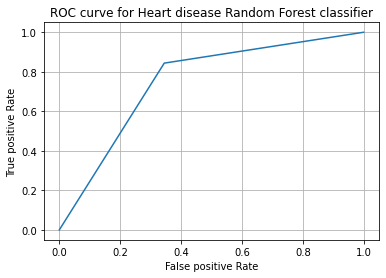

In [244]:
#Random Forest
fpr, tpr, threshold = roc_curve(y_test, prediccion_rf)
plt.plot(fpr, tpr)
plt.title('ROC curve for Heart disease Random Forest classifier')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.grid(True)

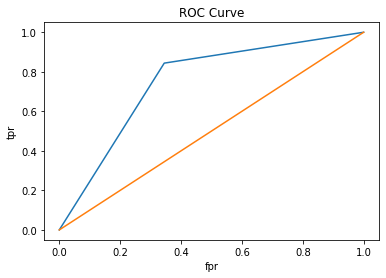

In [245]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0,1], [0,1])
ax.set(title="ROC Curve",
        xlabel="fpr",
        ylabel="tpr",)
plt.show()

### Classification_report

In [246]:
target_names = ['Padece de enfermedad', 'No padece de enfermedad']
print(classification_report(y_test,prediccion_rf,target_names=target_names))

                         precision    recall  f1-score   support

   Padece de enfermedad       0.79      0.66      0.72        29
No padece de enfermedad       0.73      0.84      0.78        32

               accuracy                           0.75        61
              macro avg       0.76      0.75      0.75        61
           weighted avg       0.76      0.75      0.75        61



In [247]:
target_names = ['Padece de enfermedad', 'No padece de enfermedad']
print(classification_report(y_test,prediccion,target_names=target_names))

                         precision    recall  f1-score   support

   Padece de enfermedad       0.80      0.83      0.81        29
No padece de enfermedad       0.84      0.81      0.83        32

               accuracy                           0.82        61
              macro avg       0.82      0.82      0.82        61
           weighted avg       0.82      0.82      0.82        61

